# MOST STREAMED SPOTIFY SONG ANALYSIS USING MACHINE LEARNING ALGORITHMS

In [4]:
# Import the 'warnings' module to manage warnings in the code
import warnings
# Ignore all warnings to prevent them from being displayed during code execution
warnings.filterwarnings('ignore')
# Import the required libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Import the 'StandardScaler' class from the'sklearn.preprocessing' module
from sklearn.preprocessing import StandardScaler

# Data Loading & Extraction

In [5]:
# Open the "spotify-2023.csv" CSV file and read it into the Pandas DataFrame ('df_sportify').
# To address character encoding issues, specify the encoding as "cp775".
df_sportify = pd.read_csv("spotify-2023.csv", encoding = "cp775")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# To quickly examine the data, show the first 5 rows of the DataFrame "df_sportify."
df_sportify.head(5)

,’╗┐track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
# To quickly examine the data, show the last 5 rows of the DataFrame "df_sportify."
df_sportify.tail(5)

,’╗┐track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
951,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


# Data Pre-Processing

In [9]:
# Display the count of unique values in the 'artist_count' column
df_sportify['artist_count'].value_counts()

,count
artist_count,
1,586
2,254
3,85
4,15
5,5
6,3
8,2
7,2


In [10]:
# Display the count of unique values in the 'released_year' column
df_sportify['released_year'].value_counts()

,count
released_year,
2022,402
2023,175
2021,119
2020,37
2019,36
2017,23
2016,18
2014,13
2013,13


In [11]:
# Display the count of unique values in the 'released_month' column
df_sportify['released_month'].value_counts()

,count
released_month,
1,133
5,128
3,86
6,86
11,80
12,75
10,73
4,66
7,62


In [12]:
# Display the count of unique values in the 'released_day' column
df_sportify['released_day'].value_counts()

,count
released_day,
1,94
21,44
13,43
24,40
2,39
20,39
4,39
7,39
6,39


In [13]:
# Display the count of unique values in the 'in_spotify_playlists' column
df_sportify['in_spotify_playlists'].value_counts()

,count
in_spotify_playlists,
896,3
86,3
356,3
1112,3
1473,3
...,...
2598,1
542,1
2459,1


In [14]:
# Display the count of unique values in the 'in_spotify_charts' column
df_sportify['in_spotify_charts'].value_counts()

,count
in_spotify_charts,
0,404
4,48
2,42
6,36
3,18
...,...
76,1
58,1
79,1


In [15]:
# Display the count of unique values in the 'streams' column
df_sportify['streams'].value_counts()

,count
streams,
723894473,2
156338624,2
1223481149,2
395591396,2
1695712020,1
...,...
448843705,1
1357608774,1
294352144,1


In [16]:
# Display the count of unique values in the 'danceability_%' column
df_sportify['danceability_%'].value_counts()

,count
danceability_%,
70,43
77,32
80,31
56,30
74,29
...,...
23,1
27,1
29,1


In [17]:
# Display the count of unique values in the 'speechiness_%' column
df_sportify['speechiness_%'].value_counts()

,count
speechiness_%,
4,175
3,151
5,130
6,76
8,52
7,49
9,37
10,24
11,22


In [18]:
# Provide a succinct overview of the DataFrame 'df_sportify'. This covers memory usage, non-null counts, and data types.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ’╗┐track_name         952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [19]:
# This helps determine the existence and amount of missing data in the dataset by checking and displaying the sum of the missing values in each column of the DataFrame "df_sportify."
df_sportify.isnull().sum()

,0
’╗┐track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


# Data Visualization

In [20]:
#Sort the DataFrame 'df_sportify' according to the 'key' column, then count how many times each group's 'in_spotify_playlists' appears.
count_sportify_play = df_sportify.groupby('key')['in_spotify_playlists'].count().reset_index()
# Use Plotly Express to create a bar plot that displays the total number of playlists according to the song keys.
plot1 = px.bar(count_sportify_play, x='key', y='in_spotify_playlists', title='Total playlist with respect to key of the songs', color='key')
# Use the previously defined Plotly Express object 'plot1' to display the generated plot.
plot1.show()

In [21]:
#Group the'mode' column of the DataFrame 'df_sportify', then add up the 'in_spotify_playlists' for every group.
sum_sportify_play = df_sportify.groupby('mode')['in_spotify_playlists'].sum().reset_index()
# Use Plotly Express to create a pie chart that displays the total number of playlists in relation to the song mode.
plot2 = px.pie(sum_sportify_play, values='in_spotify_playlists', names='mode', title='Total paylist with respect to mode')
# Display the pie chart
plot2.show()

In [22]:
# Compute the total of 'danceability_%' for each year by grouping the DataFrame 'df_sportify' by the'released_year' column.
#Using Plotly Express, create an area plot that shows the total amount of danceability relative to the year that the songs were released.
sum_dancebility = df_sportify.groupby('released_year')['danceability_%'].sum().reset_index()
plot3 = px.area(sum_dancebility, x='released_year', y='danceability_%', title='Total sum of the danceability of song with respect to year')
plot3.show()

In [23]:
#To find the total of'speechiness_%' for each key, group the DataFrame 'df_sportify' by the 'key' column.
# Using Plotly Express, create an area plot that shows the total sum of the speechiness percentage in relation to the song key.
sum_speechiness = df_sportify.groupby('key')['speechiness_%'].sum().reset_index()
plot4 = px.area(sum_speechiness, x='key', y='speechiness_%', title='Total sum of the speechiness percentage song with respect to key')
plot4.show()

In [24]:
# Count the instances of'streams' for each key by grouping the DataFrame 'df_sportify' by the 'key' column.
# 'Most Stream analysis': use Plotly Express to create a pie chart that shows the distribution of streams among various keys.
sum_sportify_stream = df_sportify.groupby('key')['streams'].count().reset_index()
plot5 = px.pie(sum_sportify_stream, values='streams', names='key', title='Most Stream analysis')
plot5.show()

In [25]:
# Group the DataFrame 'df_sportify' by the 'mode' column and count the occurrences of 'streams' for each mode.
# Create a pie chart using Plotly Express, displaying the distribution of streams among different modes in a 'Most stream by mode' analysis.
sum_sportify_stream1 = df_sportify.groupby('mode')['streams'].count().reset_index()
plot6 = px.pie(sum_sportify_stream1, values='streams', names='mode', hole=0.6, title='Most stream by mode')
plot6.show()

In [34]:
# Take specific columns out of the DataFrame 'df_sportify': 'artist(s)_name, track_name, in_deezer_playlists, in_shazam_charts, key'.
# Columns are dropped when the 'axis=1' parameter is used, and changes are applied directly to the original DataFrame when the 'inplace=True' option is selected.
df_sportify.drop(['artist(s)_name','track_name', 'in_deezer_playlists', 'in_shazam_charts', 'key'], axis=1, inplace=True, errors='ignore')

In [35]:
df_sportify.columns = df_sportify.columns.str.strip().str.lower()
print(df_sportify.columns)


Index(['’╗┐track_name', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm',
       'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [36]:
# After removing certain columns, show the first few rows of the updated DataFrame "df_sportify"
df_sportify.head()

,’╗┐track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,10,125,Major,80,89,83,31,0,8,4
1,LALA,1,2023,3,23,1474,48,133716286,48,126,14,92,Major,71,61,74,7,0,10,4
2,vampire,1,2023,6,30,1397,113,140003974,94,207,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,15,144,Minor,65,23,80,14,63,11,6


In [37]:
# Show a brief summary of the updated DataFrame "df_sportify" # Data types, non-null counts, and memory usage following column removal are all included in this.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ’╗┐track_name         952 non-null    object
 1   artist_count          952 non-null    int64 
 2   released_year         952 non-null    int64 
 3   released_month        952 non-null    int64 
 4   released_day          952 non-null    int64 
 5   in_spotify_playlists  952 non-null    int64 
 6   in_spotify_charts     952 non-null    int64 
 7   streams               952 non-null    int64 
 8   in_apple_playlists    952 non-null    int64 
 9   in_apple_charts       952 non-null    int64 
 10  in_deezer_charts      952 non-null    int64 
 11  bpm                   952 non-null    int64 
 12  mode                  952 non-null    object
 13  danceability_%        952 non-null    int64 
 14  valence_%             952 non-null    int64 
 15  energy_%              952 non-null    in

In [38]:
# Convert the values in DataFrame 'df_sportify's'mode' column to binary representation:
#'Major' corresponds to 1 and 'Minor' to 0.
df_sportify['mode'] = df_sportify['mode'].map({'Major': 1, 'Minor': 0})

In [39]:
#Present a brief description of the DataFrame 'df_sportify' following the application of binary representation to the'mode' column.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ’╗┐track_name         952 non-null    object
 1   artist_count          952 non-null    int64 
 2   released_year         952 non-null    int64 
 3   released_month        952 non-null    int64 
 4   released_day          952 non-null    int64 
 5   in_spotify_playlists  952 non-null    int64 
 6   in_spotify_charts     952 non-null    int64 
 7   streams               952 non-null    int64 
 8   in_apple_playlists    952 non-null    int64 
 9   in_apple_charts       952 non-null    int64 
 10  in_deezer_charts      952 non-null    int64 
 11  bpm                   952 non-null    int64 
 12  mode                  952 non-null    int64 
 13  danceability_%        952 non-null    int64 
 14  valence_%             952 non-null    int64 
 15  energy_%              952 non-null    in

In [40]:
# To evaluate the effects of earlier changes, check and show the total of missing values in each column of the DataFrame "df_sportify" .
df_sportify.isnull().sum()

,0
’╗┐track_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0
in_apple_charts,0


# Random Forest Classifier

In [41]:
# Import the Scikit-Learn modules required for RandomForestClassifier.
# Import functions to divide the dataset and assess the performance of the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# For modeling, keep the target variable (y) and the features (X) apart.
# Y contains the'mode' column, which represents the target variable, while
# X contains all other columns.
X = df_sportify.drop('mode', axis=1)
y = df_sportify['mode']

In [43]:
# Use train_test_split to divide the dataset into training and testing sets.
# X_train and y_train stand for the training features and target variable, and X_test and y_test for the testing features and variable.
# For reproducibility, a random seed (random_state=42) is utilized, and the test set size is set to 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Malas Decisiones'

In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_y_pred)
print('Accuracy of  RandomForestClassifier is ', round(accuracy_rf,2))

Accuracy of  RandomForestClassifier is  0.57


In [ ]:
rf_report = classification_report(y_test, rf_y_pred)

print('Classification Report:\n', rf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.39        83
           1       0.59      0.75      0.66       108

    accuracy                           0.57       191
   macro avg       0.55      0.54      0.53       191
weighted avg       0.55      0.57      0.55       191



# Linear Regression

In [ ]:
# Import the Scikit-Learn modules required for LinearRegression.
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating X and y
X = df_sportify['released_month']
y = df_sportify['streams']

In [ ]:
#Splitting the variables as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Reshaping the train set without adding a new column
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Creating an instance of the Linear Regression model
linear_model = LinearRegression()

# Fitting the model using the .fit() method
linear_model.fit(X_train_reshaped, y_train)

LinearRegression()

In [ ]:
# Displaying the intercept value
print("Intercept Value:", linear_model.intercept_)

# Displaying the slope value
print('Slope Value:', linear_model.coef_[0])

Intercept Value: 503289040.99568623
Slope Value: 985953.7146833077


In [ ]:
# Generating predictions for y_values
predicted_y_train = linear_model.predict(X_train_reshaped)
predicted_y_test = linear_model.predict(X_test_reshaped)

#Calculating the R-squared value
r_squared = r2_score(y_test, predicted_y_test)
print("R-squared:", r_squared)

# Comparing the R-squared values for both the training and testing datasets
print("R-squared on Train Data:", r2_score(y_train, predicted_y_train))
print("R-squared on Test Data:", r2_score(y_test, predicted_y_test))

R-squared: -0.002235377063729338
R-squared on Train Data: 3.4999363452525856e-05
R-squared on Test Data: -0.002235377063729338


In [ ]:
# Generate predictions on the test dataset
predicted_y = linear_model.predict(X_test_reshaped)

# Assess the model performance using regression metrics
mse = mean_squared_error(y_test, predicted_y)
mae = mean_absolute_error(y_test, predicted_y)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.6679141351877642e+17
Mean Absolute Error: 370968404.78580385


# DecisionTreeClassifier

In [ ]:
# Import the Scikit-Learn modules required for DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df_sportify.drop('mode', axis=1)  # Features
y = df_sportify['mode']  # Target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#Establish a decision tree classifier
classifier_model = DecisionTreeClassifier()

#Train the model using the training dataset
classifier_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Generate predictions on the test dataset
predicted_y_test = classifier_model.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, classifier_model.predict(X_train))

# Compute test accuracy
testing_accuracy = accuracy_score(y_test, predicted_y_test)

# Assess validation accuracy
validation_accuracy = accuracy_score(y_val, classifier_model.predict(X_val))

# Compute cross-validation score
cross_validation_score = cross_val_score(classifier_model, X, y, cv=5).mean()

# Display the results
print("Train Accuracy:", training_accuracy)
print("Test Accuracy:", testing_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Cross-Validation Score:", cross_validation_score)

Train Accuracy: 1.0
Test Accuracy: 0.4965034965034965
Validation Accuracy: 0.6153846153846154
Cross-Validation Score: 0.5183521631303389


In [ ]:
# Create a classification report
classification_report_result = classification_report(y_test, predicted_y_test, output_dict=True)

# Convert the classification report dictionary into a DataFrame
classification_report_dataframe = pd.DataFrame(classification_report_result).transpose()

# Display the Classification Report DataFrame
print("\nClassification Report:")
print(classification_report_dataframe)


Classification Report:
              precision    recall  f1-score     support
0              0.400000  0.440678  0.419355   59.000000
1              0.576923  0.535714  0.555556   84.000000
accuracy       0.496503  0.496503  0.496503    0.496503
macro avg      0.488462  0.488196  0.487455  143.000000
weighted avg   0.503927  0.496503  0.499361  143.000000



Confusion Matrix:


<Axes: >

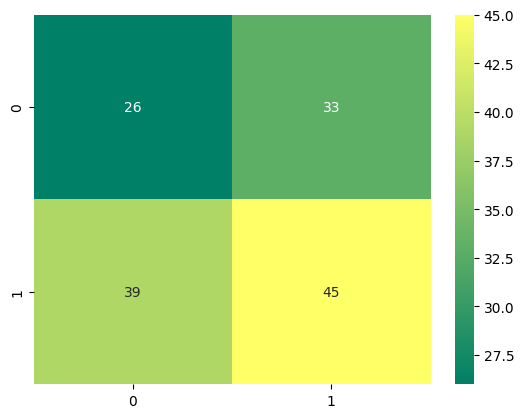

In [ ]:
#Display the Confusion Matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, predicted_y_test), annot=True, cmap='summer')